<a href="https://colab.research.google.com/github/JanainaCC/Comunica-esDigitais/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OBJETIVOS**

❖ Verificar o desempenho da comunicação em um canal AWGN, considerando
que a energia de bit é igual a uma unidade linear de energia.

❖ Compreender os conceitos de degradações que afetam a forma de onda, por
meio do diagrama de olho.

❖ Modelar a transmissão binária de um sinal polar transmitido em banda base,
considerando bits equiprováveis.

❖ Identificar o comportamento da forma de onda (interferência intersimbólica)
por meio do diagrama de olho, ao inserir degradações como: ruído,
deslocamento jitter e oscilação de taxa de transmissão.

o Utilizar um sinal polar e o cosseno levantado


## **RESULTADOS ESPERADOS**

#### Executar primeiro

In [102]:
#importando bibliotecas utilizadas
import random
import numpy as np
import matplotlib.pyplot as plt

In [255]:
#definindo funçõess utilizadas
Fs = 10
def get_filter(name, T, rolloff=None):
    def rc(t, beta):
        import warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            return np.sinc(t)*np.cos(np.pi*beta*t)/(1-(2*beta*t)**2)
    def rrc(t, beta):
        return (np.sin(np.pi*t*(1-beta))+4*beta*t*np.cos(np.pi*t*(1+beta)))/(np.pi*t*(1-(4*beta*t)**2))
        
    # rolloff is ignored for triang and rect
    if name == 'rect':
        return lambda t: (abs(t/T)<0.5).astype(int)    
    if name == 'triang': 
        return lambda t: (1-abs(t/T)) * (abs(t/T)<1).astype(float)
    elif name == 'rc':
        return lambda t: rc(t/T, rolloff)
    elif name == 'rrc':
        return lambda t: rrc(t/T, rolloff)

def get_signal(g, d):
    """Generate the transmit signal as sum(d[k]*g(t-kT))"""
    t = np.arange(-2*T, (len(d)+2)*T, 1/Fs)
    g0 = g(np.array([1e-8]))
    xt = sum(d[k]*g(t-k*T) for k in range(len(d)))
    return t, xt/g0

def showEyeDiagramDrawing(xt, T, partInd):
    plt.subplot(211)
    plt.plot(t, xt, 'k-', lw=1, label='$x(t)$') # Plot the overall signal
    
    sigStart = 2*T*Fs  # ignore some transient effects at the beginning of the signal
    samples_perT = Fs*T
    samples_perWindow = 2*T*Fs
    # extract the part of the signal we use for the current part of the eye diagram
    sig_part = xt[sigStart + samples_perT*partInd + np.arange(samples_perWindow)]
    t_emphasize = np.arange(2*T+T*partInd, 2*T+T*partInd+2*T, 1/Fs) + t.min()
    # mark the part of the signal that currently contributes to the eye diagram
    plt.plot(t_emphasize, sig_part, 'b-', lw=2)   
    
    
    plt.subplot(235)
    t_part = np.arange(-T, T, 1/Fs)
    # draw all parts of the eye diagram from previous signal portions in black
    for p in range(partInd):
        plt.plot(t_part, xt[sigStart + samples_perT*p + np.arange(samples_perWindow)], 'k-')
    # draw the current part of the eye diagram in thick blue
    plt.plot(t_part, sig_part, 'b-', lw=2)

def drawFullEyeDiagram(xt):
    """Draw the eye diagram using all parts of the given signal xt"""
    samples_perT = Fs*T
    samples_perWindow = 2*Fs*T
    parts = []
    startInd = 2*samples_perT   # ignore some transient effects at beginning of signal
    
    for k in range(int(len(xt)/samples_perT) - 6):
        parts.append(xt[startInd + k*samples_perT + np.arange(samples_perWindow)])
    parts = np.array(parts).T
    
    t_part = np.arange(-T, T, 1/Fs)
    plt.plot(t_part, parts, 'b-')
    
def drawSignals(g, data=None):
    """Draw the transmit signal, the used filter and the resulting eye-diagram
    into one figure."""
    N = 100;
    if data is None:
        data = 2*((np.random.randn(N)>0))-1
        # fix the first 10 elements for  keeping the shown graphs constant
        # between eye diagrams
        data[0:10] = 2*np.array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0])-1
    
    t, xt = get_signal(g, data)

    plt.subplot(223)
    t_g = np.arange(-4*T, 4*T, 1/Fs)
    plt.plot(t_g, g(t_g))

    
    plt.subplot(211)
    plt.plot(t, xt)
    plt.stem(data)
    
    plt.subplot(224)
    drawFullEyeDiagram(xt); plt.ylim((-2,2))
    plt.tight_layout()

def showRCEyeDiagram(alpha):
    g = get_filter('rc', T=1, rolloff=alpha)
    drawSignals(g)

### Figura da constelação antes e após a inserção de ruído, em gráficos distintos.

o Plote a figura da constelação para 3 valores de 𝐸𝑏/𝑁0 (por exemplo, 8 dB, 16 dB e 24 dB).

o Considere 200 bits transmitidos e recebidos.

###Diagrama de olho, com cada tipo de degradação da forma de onda

o Inicialmente, plote os gráficos dos sinais sem degradação.

o Em seguida, plote com as degradações, em gráficos distintos. 

In [278]:
#gerando sequencia de bits
bits = 200;
b = np.random.randint(0,2,bits)
#gerando sinal polar
polar = b
polar[polar < 1] = -1

T = 1
g = get_filter('rc', T, rolloff=0.5)  # RC filter with rolloff alpha=0.5
h = get_filter('rect', T)  # RECT filter

####8 dB

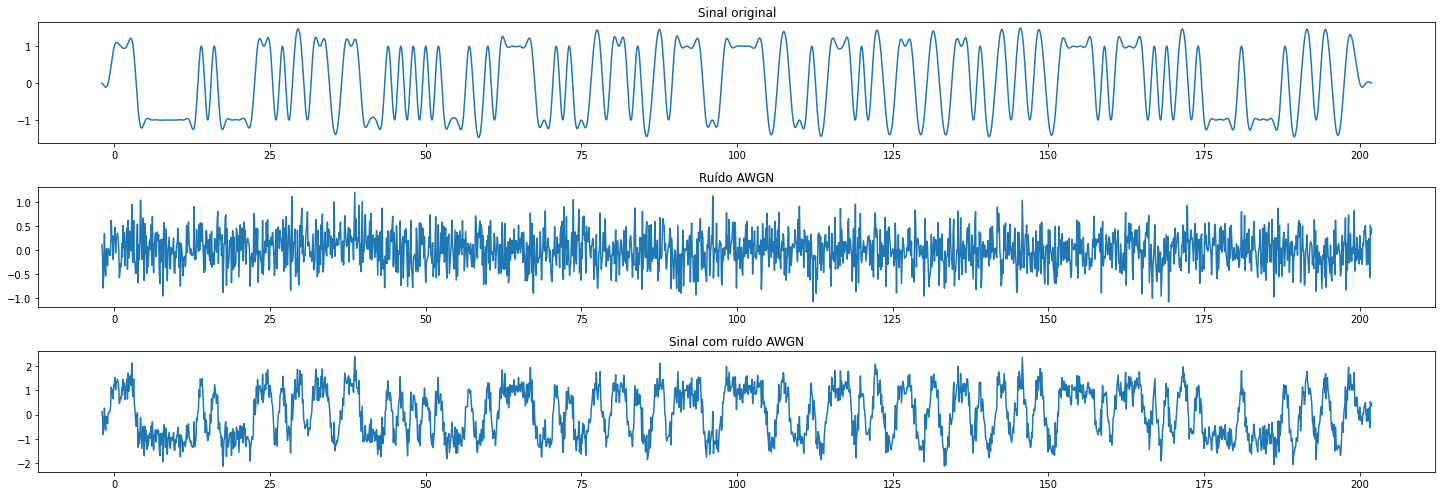

Text(0.5, 1.0, '$E_b$/$N_0$ = 8 dB')

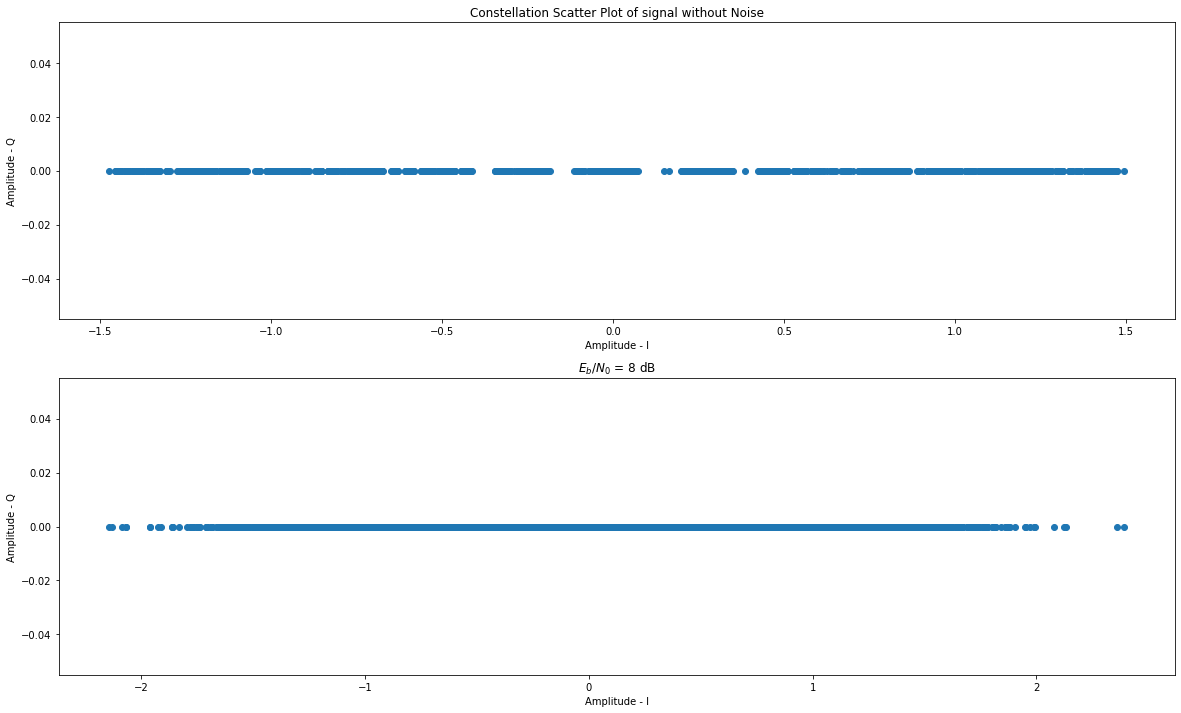

In [281]:
# AWGN
SNR_dB = 8

t, coslev = get_signal(g, polar)

# Calcula a potência do sinal
Ps = np.sum(np.abs(coslev)**2)/len(coslev) 
# Calcula a SNR linear
SNR = 10**(SNR_dB/10)                          
# Calcula a potência do ruído
Pn = Ps/SNR                                    
# Desvio padrão para ruído AWGN (amostras reais)
noiseSigma = np.sqrt(Pn)                      
# Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,len(coslev) )       
# Sinal Ruidoso
ycoslev = coslev + n                                      
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,coslev)
#
plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,n)
#
plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,ycoslev)
#
plt.tight_layout()
plt.show()

# Figura da constelação antes do ruído
plt.figure(2,[20,12])
plt.subplot(211)
plt.scatter(np.real(coslev),np.imag(coslev));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title('Constellation Scatter Plot of signal without Noise');
# Figura da constelação depois do ruído
plt.subplot(212)
plt.scatter(np.real(ycoslev),np.imag(ycoslev));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title("$E_b$/$N_0$ = {} dB".format(SNR_dB))

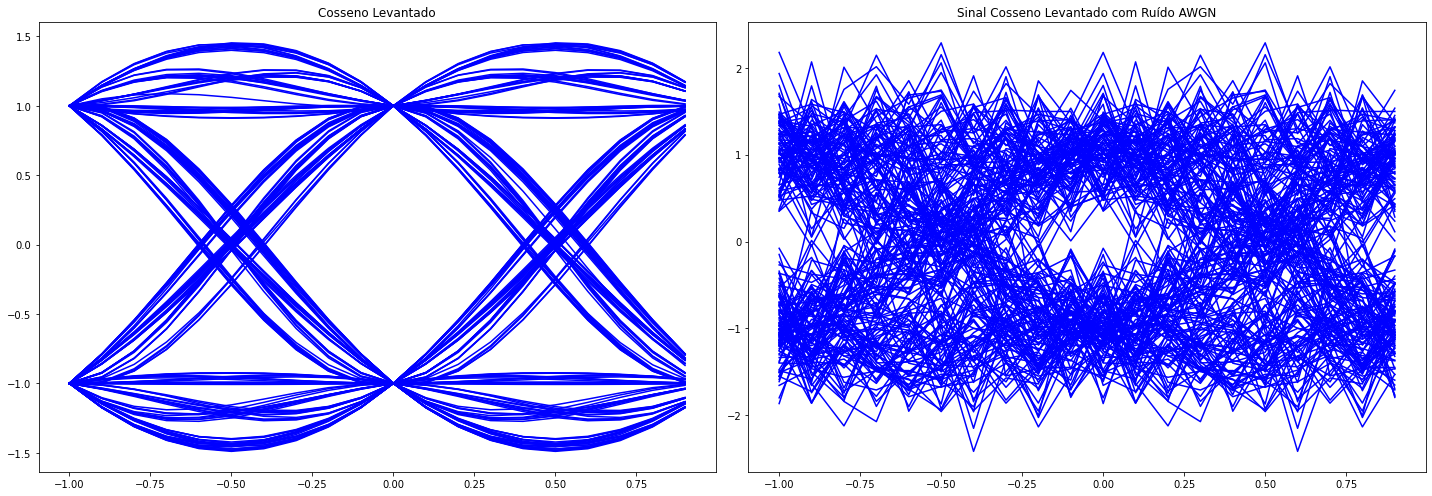

In [259]:
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(121)
plt.title("Cosseno Levantado")
drawFullEyeDiagram(coslev)
#
plt.subplot(122)
plt.title("Sinal Cosseno Levantado com Ruído AWGN")
drawFullEyeDiagram(ycoslev)
#
plt.tight_layout()
plt.show()

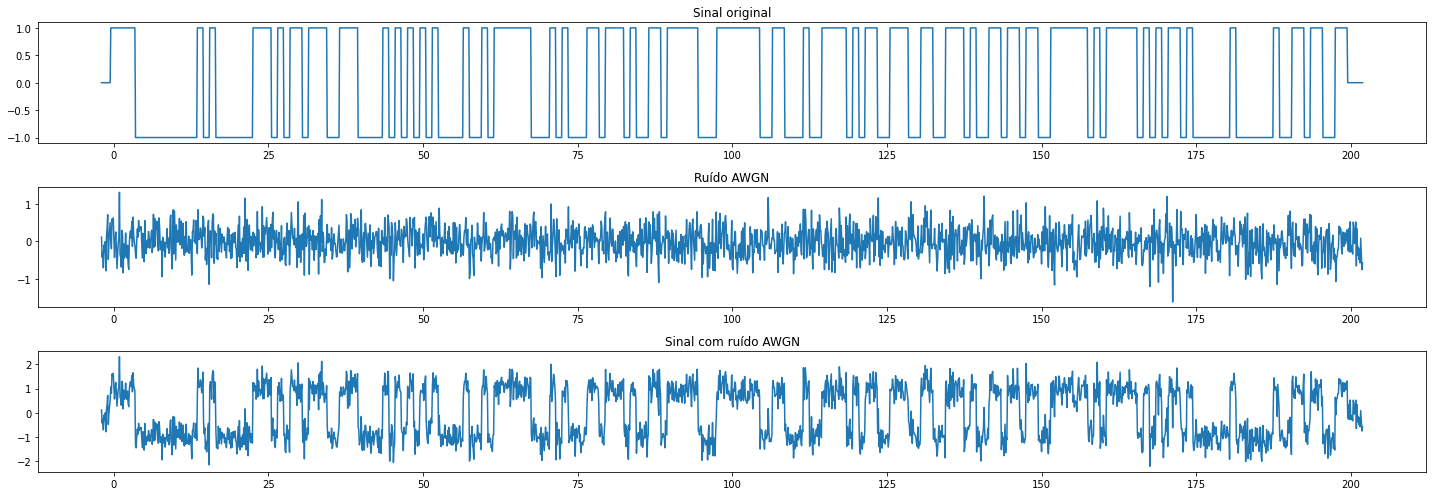

Text(0.5, 1.0, '$E_b$/$N_0$ = 8 dB')

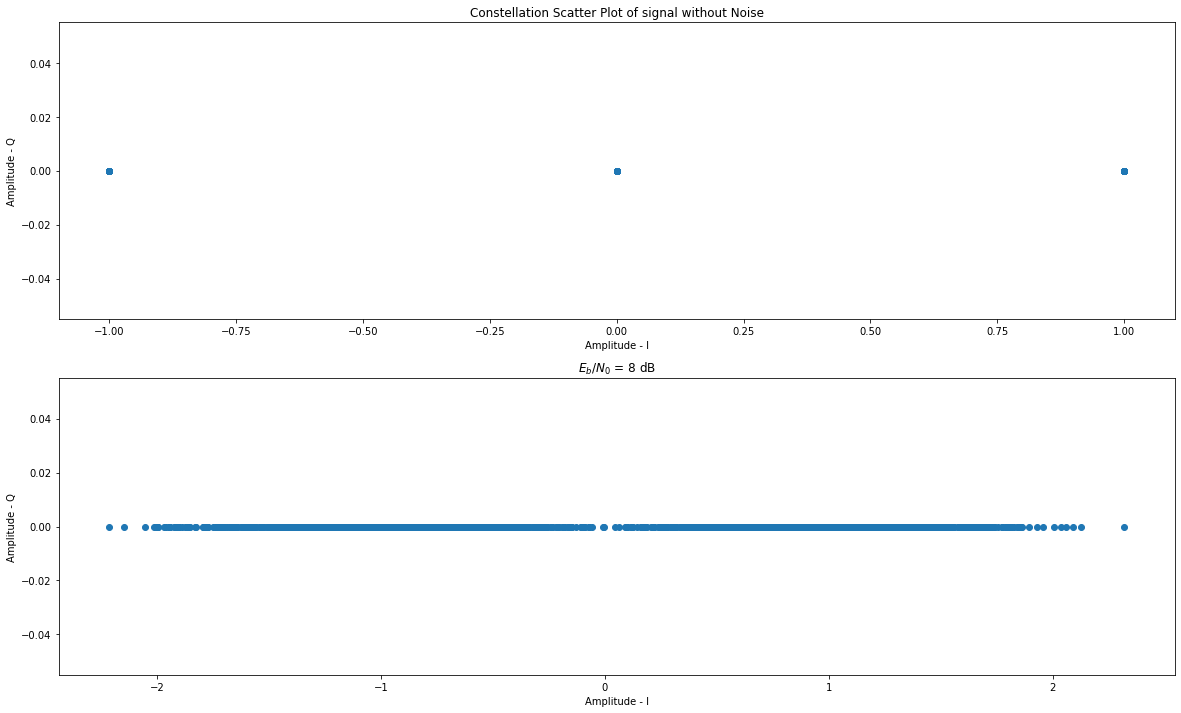

In [282]:
# AWGN
SNR_dB = 8

t, rect = get_signal(h, polar)

# Calcula a potência do sinal
Ps = np.sum(np.abs(rect)**2)/len(rect) 
# Calcula a SNR linear
SNR = 10**(SNR_dB/10)                          
# Calcula a potência do ruído
Pn = Ps/SNR                                    
# Desvio padrão para ruído AWGN (amostras reais)
noiseSigma = np.sqrt(Pn)                      
# Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,len(rect) )       
# Sinal Ruidoso
yrect = rect + n                                      
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,rect)
#
plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,n)
#
plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,yrect)
#
plt.tight_layout()
plt.show()

# Figura da constelação antes do ruído
plt.figure(2,[20,12])
plt.subplot(211)
plt.scatter(np.real(rect),np.imag(rect));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title('Constellation Scatter Plot of signal without Noise');
# Figura da constelação depois do ruído
plt.subplot(212)
plt.scatter(np.real(yrect),np.imag(yrect));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title("$E_b$/$N_0$ = {} dB".format(SNR_dB))

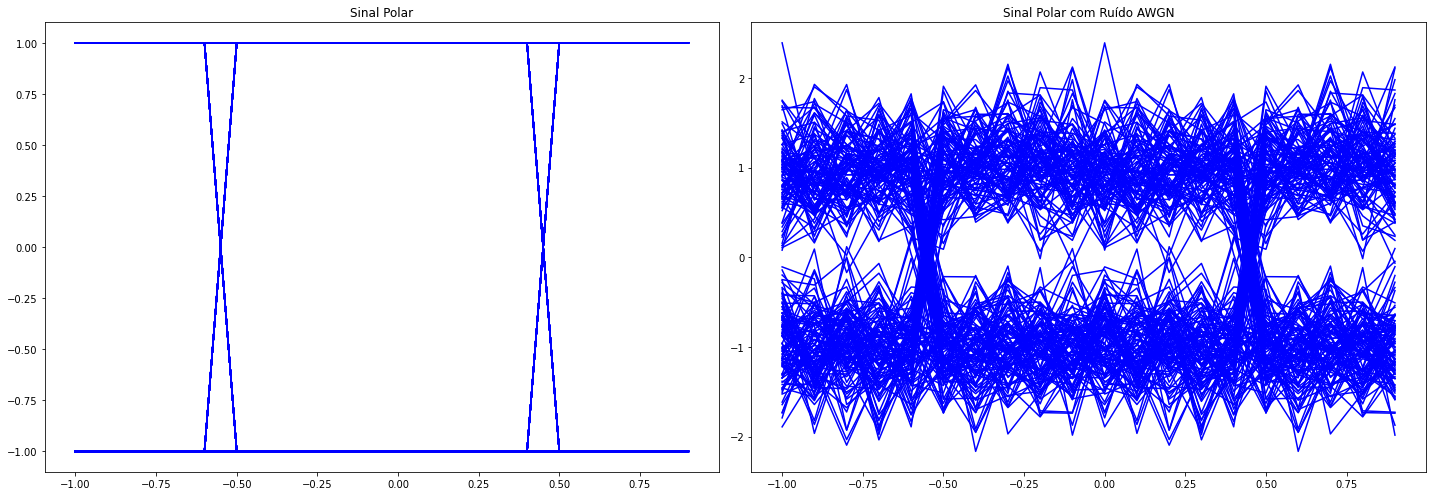

In [260]:
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(121)
plt.title("Sinal Polar")
drawFullEyeDiagram(rect)
#
plt.subplot(122)
plt.title("Sinal Polar com Ruído AWGN")
drawFullEyeDiagram(yrect)
#
plt.tight_layout()
plt.show()

#### 16 dB

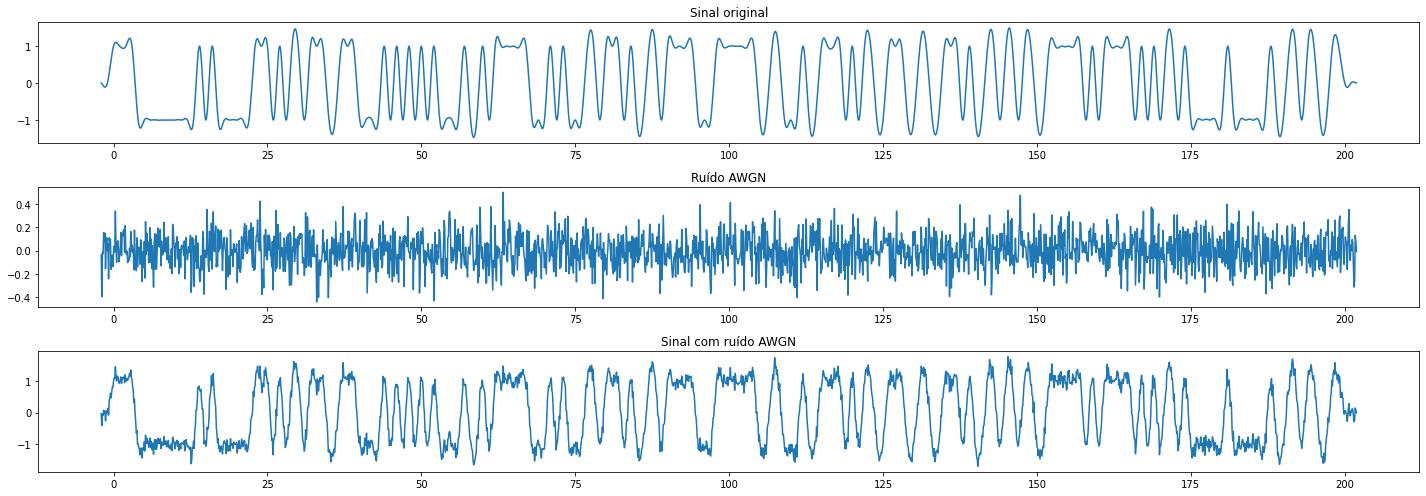

Text(0.5, 1.0, '$E_b$/$N_0$ = 16 dB')

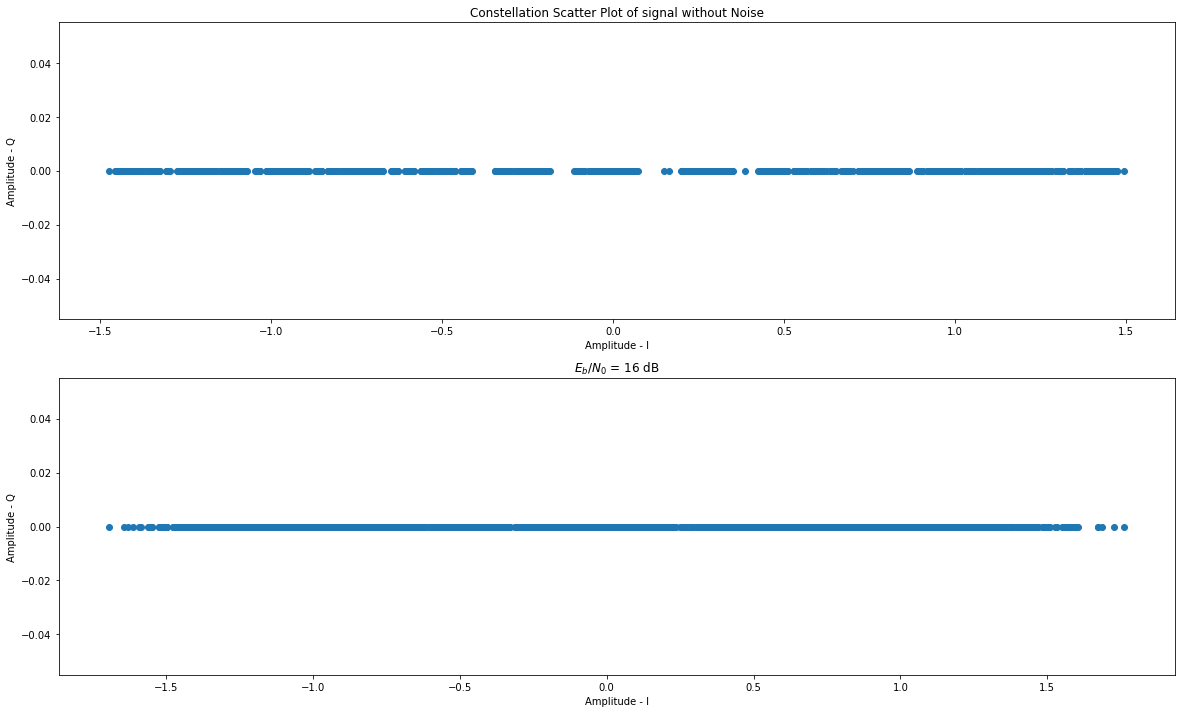

In [283]:
# AWGN
SNR_dB = 16

t, coslev = get_signal(g, polar)

# Calcula a potência do sinal
Ps = np.sum(np.abs(coslev)**2)/len(coslev) 
# Calcula a SNR linear
SNR = 10**(SNR_dB/10)                          
# Calcula a potência do ruído
Pn = Ps/SNR                                    
# Desvio padrão para ruído AWGN (amostras reais)
noiseSigma = np.sqrt(Pn)                      
# Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,len(coslev) )       
# Sinal Ruidoso
ycoslev = coslev + n                                      
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,coslev)
#
plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,n)
#
plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,ycoslev)
#
plt.tight_layout()
plt.show()

# Figura da constelação antes do ruído
plt.figure(2,[20,12])
plt.subplot(211)
plt.scatter(np.real(coslev),np.imag(coslev));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title('Constellation Scatter Plot of signal without Noise');
# Figura da constelação depois do ruído
plt.subplot(212)
plt.scatter(np.real(ycoslev),np.imag(ycoslev));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title("$E_b$/$N_0$ = {} dB".format(SNR_dB))

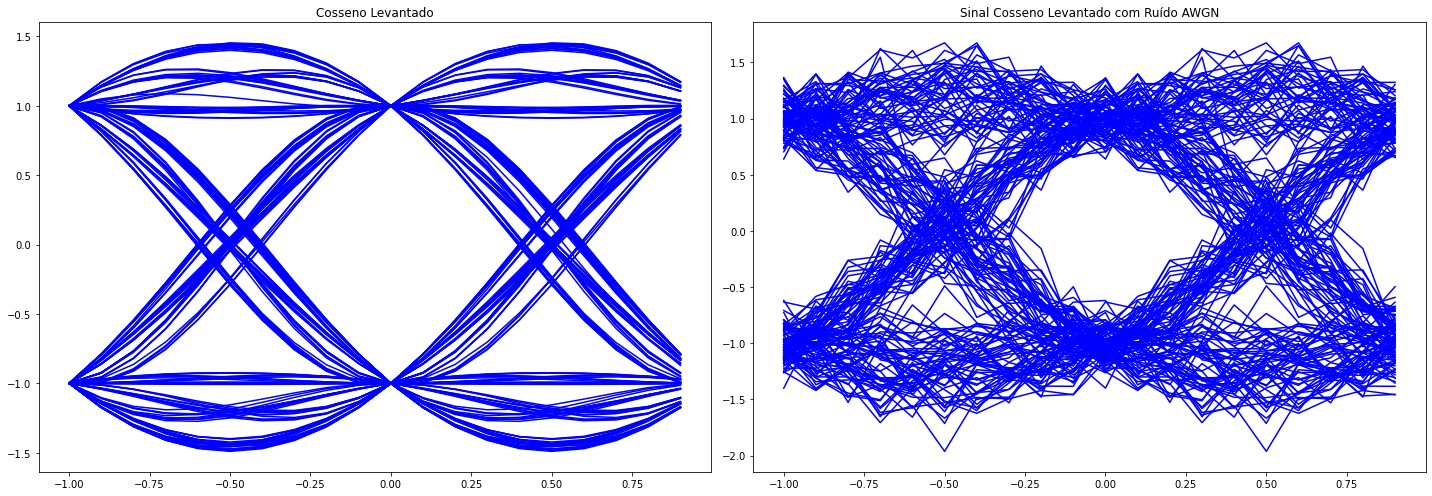

In [271]:
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(121)
plt.title("Cosseno Levantado")
drawFullEyeDiagram(coslev)
#
plt.subplot(122)
plt.title("Sinal Cosseno Levantado com Ruído AWGN")
drawFullEyeDiagram(ycoslev)
#
plt.tight_layout()
plt.show()

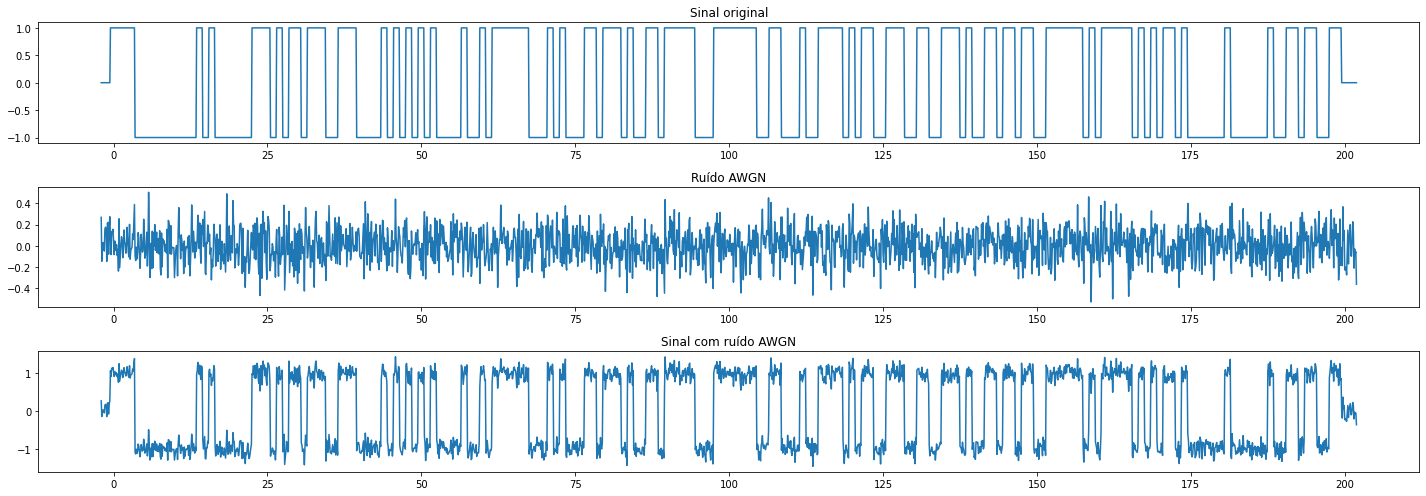

Text(0.5, 1.0, '$E_b$/$N_0$ = 16 dB')

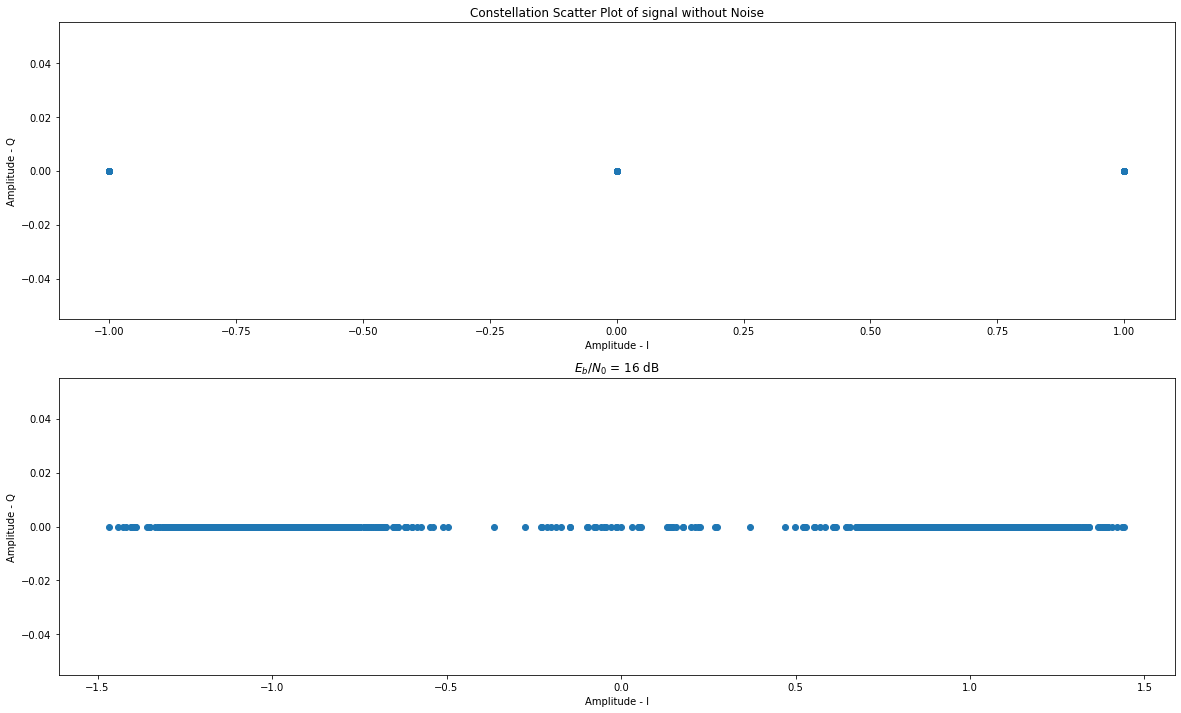

In [284]:
# AWGN
SNR_dB = 16

t, rect = get_signal(h, polar)

# Calcula a potência do sinal
Ps = np.sum(np.abs(rect)**2)/len(rect) 
# Calcula a SNR linear
SNR = 10**(SNR_dB/10)                          
# Calcula a potência do ruído
Pn = Ps/SNR                                    
# Desvio padrão para ruído AWGN (amostras reais)
noiseSigma = np.sqrt(Pn)                      
# Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,len(rect) )       
# Sinal Ruidoso
yrect = rect + n                                      
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,rect)
#
plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,n)
#
plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,yrect)
#
plt.tight_layout()
plt.show()

# Figura da constelação antes do ruído
plt.figure(2,[20,12])
plt.subplot(211)
plt.scatter(np.real(rect),np.imag(rect));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title('Constellation Scatter Plot of signal without Noise');
# Figura da constelação depois do ruído
plt.subplot(212)
plt.scatter(np.real(yrect),np.imag(yrect));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title("$E_b$/$N_0$ = {} dB".format(SNR_dB))

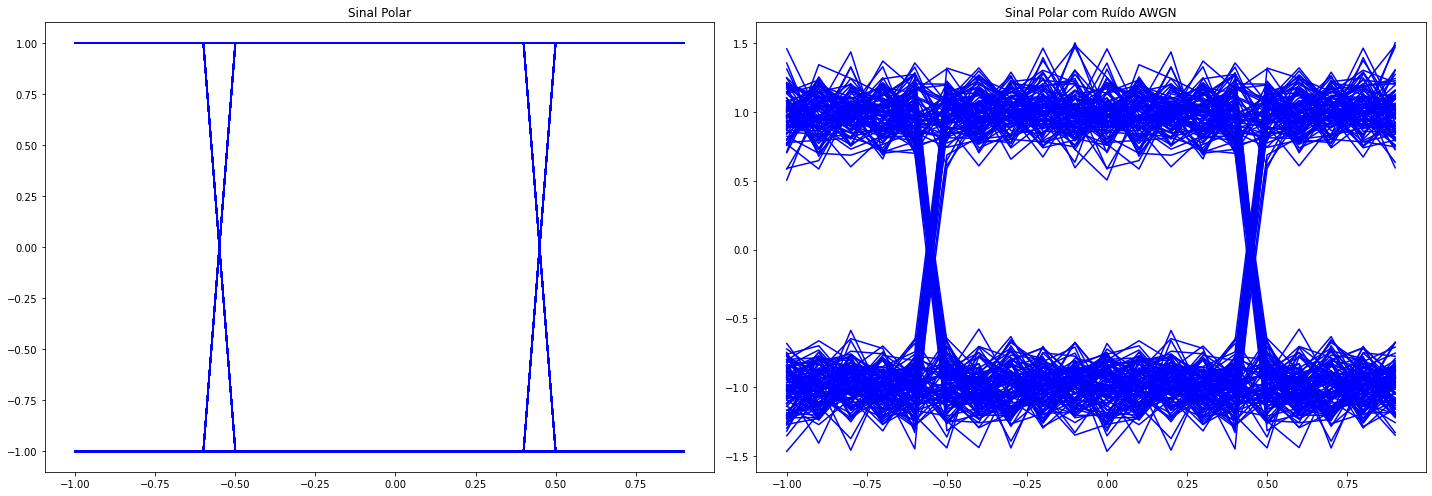

In [273]:
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(121)
plt.title("Sinal Polar")
drawFullEyeDiagram(rect)
#
plt.subplot(122)
plt.title("Sinal Polar com Ruído AWGN")
drawFullEyeDiagram(yrect)
#
plt.tight_layout()
plt.show()

#### 24 dB

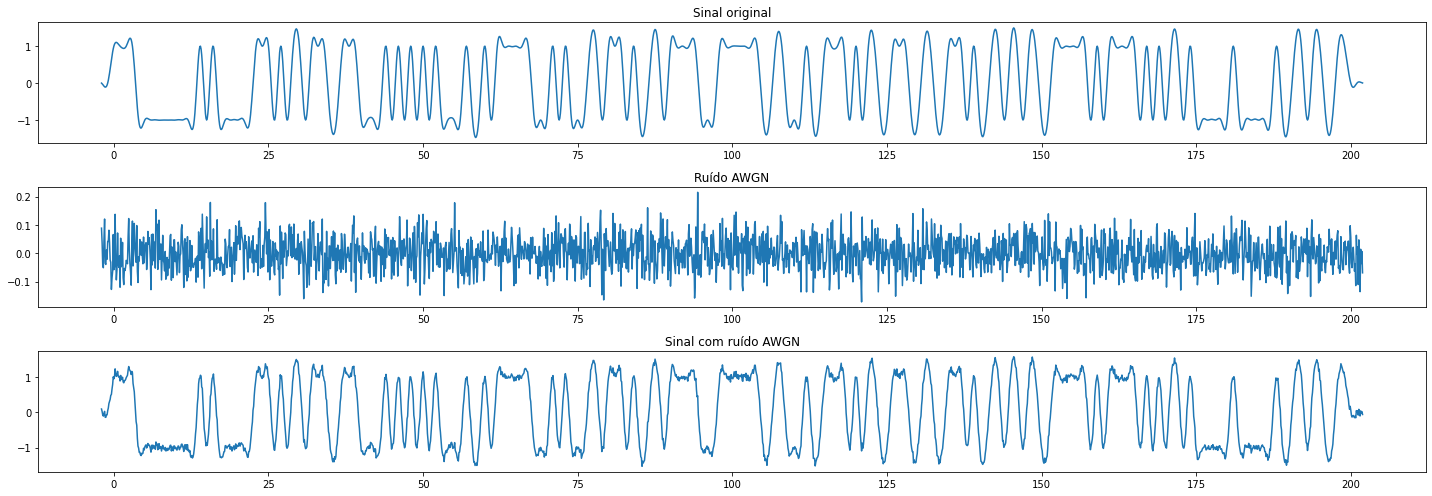

Text(0.5, 1.0, '$E_b$/$N_0$ = 24 dB')

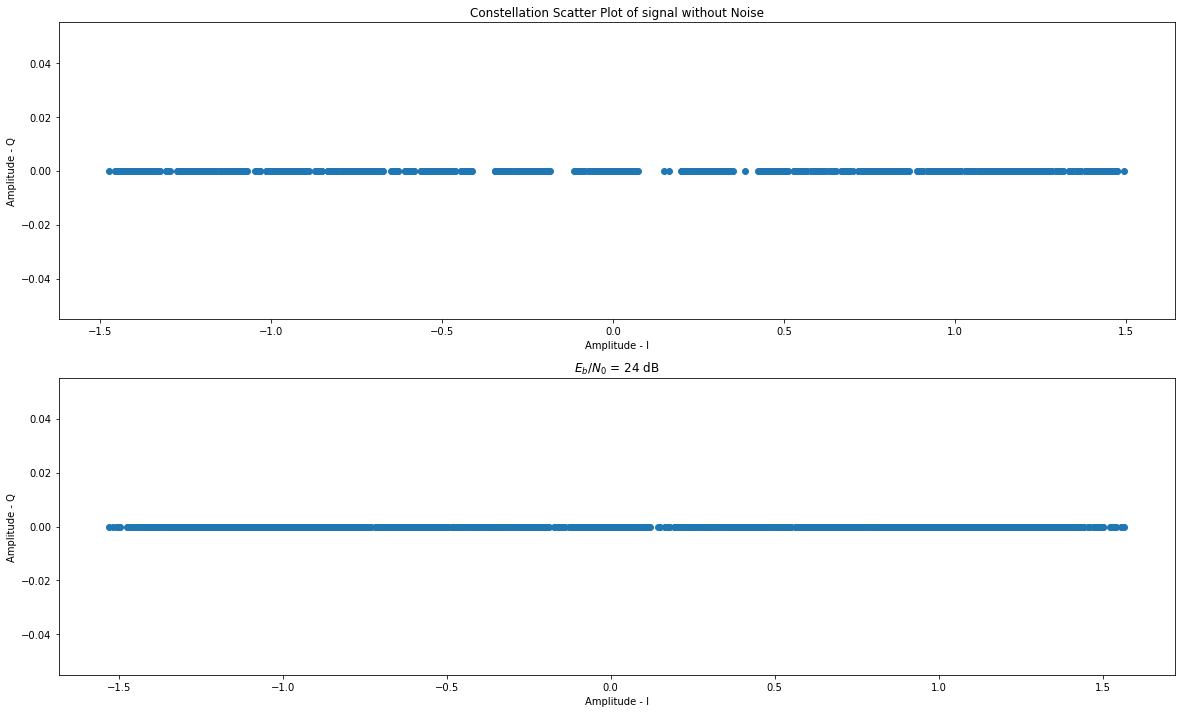

In [285]:
# AWGN
SNR_dB = 24

t, coslev = get_signal(g, polar)

# Calcula a potência do sinal
Ps = np.sum(np.abs(coslev)**2)/len(coslev) 
# Calcula a SNR linear
SNR = 10**(SNR_dB/10)                          
# Calcula a potência do ruído
Pn = Ps/SNR                                    
# Desvio padrão para ruído AWGN (amostras reais)
noiseSigma = np.sqrt(Pn)                      
# Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,len(coslev) )       
# Sinal Ruidoso
ycoslev = coslev + n                                      
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,coslev)
#
plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,n)
#
plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,ycoslev)
#
plt.tight_layout()
plt.show()

# Figura da constelação antes do ruído
plt.figure(2,[20,12])
plt.subplot(211)
plt.scatter(np.real(coslev),np.imag(coslev));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title('Constellation Scatter Plot of signal without Noise');
# Figura da constelação depois do ruído
plt.subplot(212)
plt.scatter(np.real(ycoslev),np.imag(ycoslev));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title("$E_b$/$N_0$ = {} dB".format(SNR_dB))

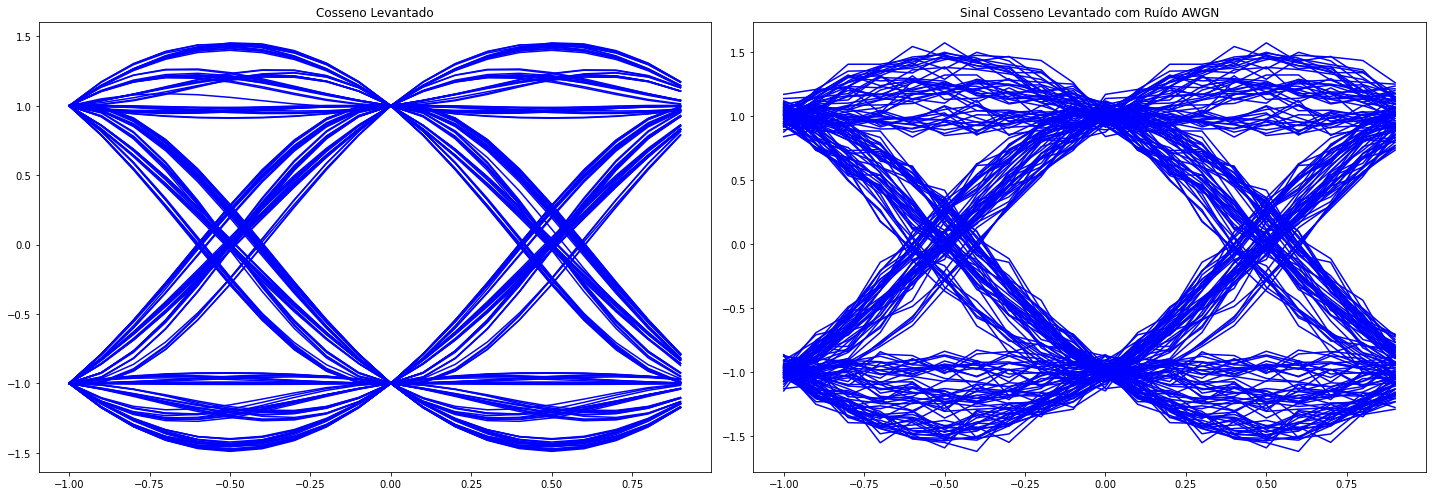

In [275]:
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(121)
plt.title("Cosseno Levantado")
drawFullEyeDiagram(coslev)
#
plt.subplot(122)
plt.title("Sinal Cosseno Levantado com Ruído AWGN")
drawFullEyeDiagram(ycoslev)
#
plt.tight_layout()
plt.show()

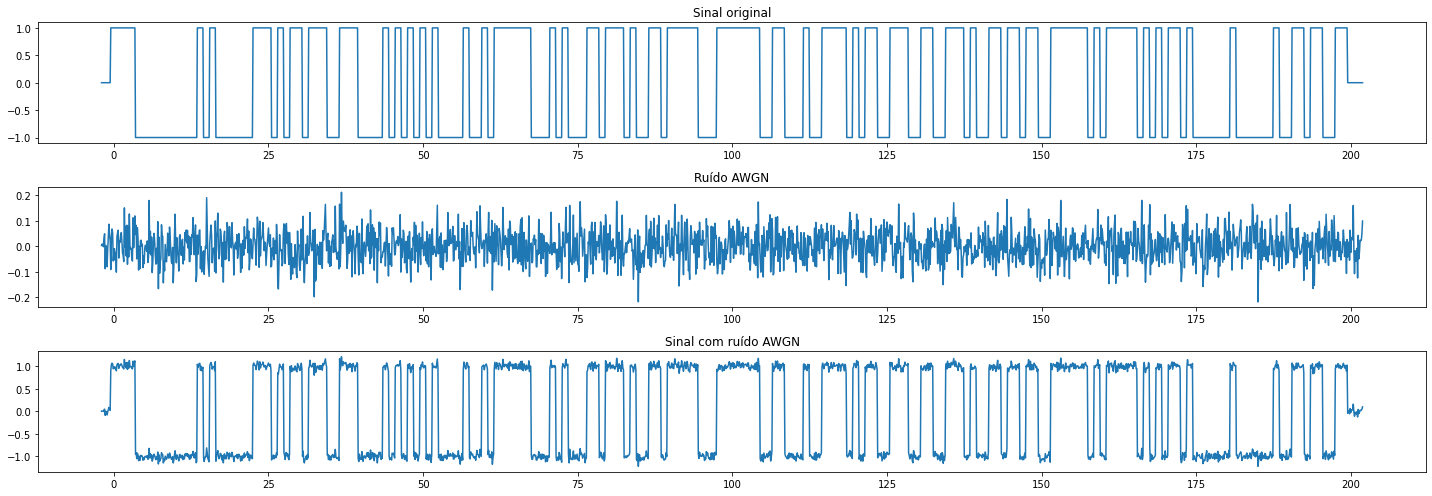

Text(0.5, 1.0, '$E_b$/$N_0$ = 24 dB')

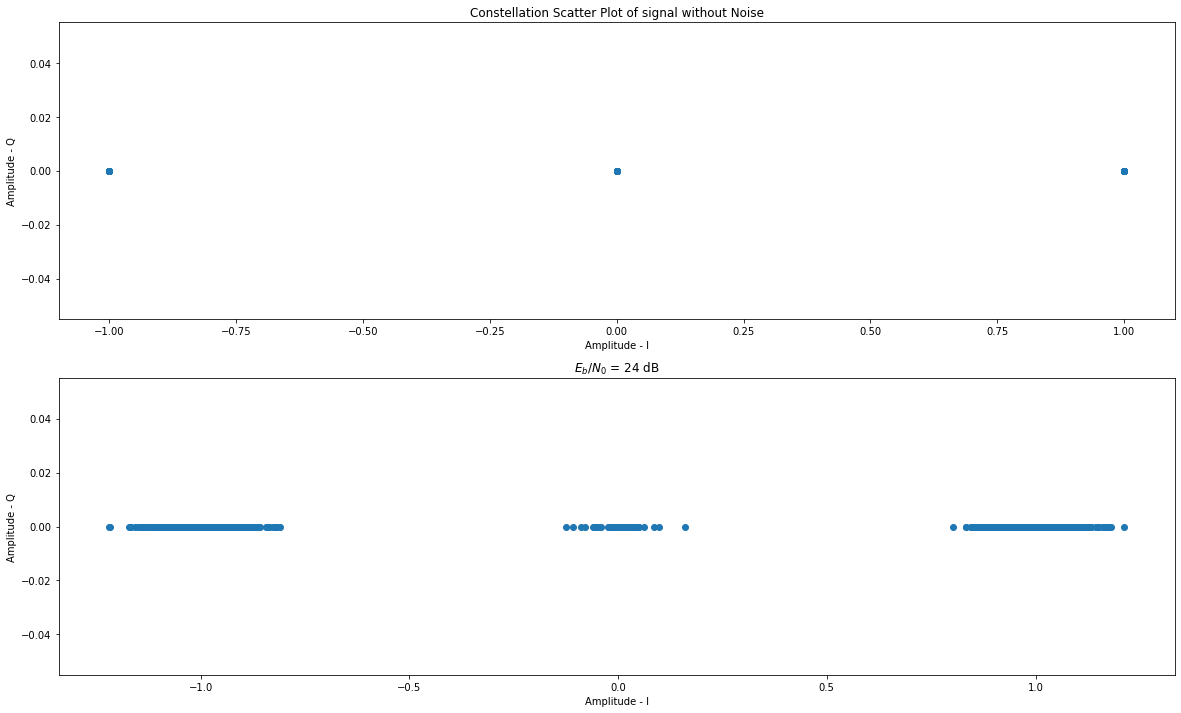

In [286]:
# AWGN
SNR_dB = 24

t, rect = get_signal(h, polar)

# Calcula a potência do sinal
Ps = np.sum(np.abs(rect)**2)/len(rect) 
# Calcula a SNR linear
SNR = 10**(SNR_dB/10)                          
# Calcula a potência do ruído
Pn = Ps/SNR                                    
# Desvio padrão para ruído AWGN (amostras reais)
noiseSigma = np.sqrt(Pn)                      
# Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,len(rect) )       
# Sinal Ruidoso
yrect = rect + n                                      
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(311)
plt.title("Sinal original")
plt.plot(t,rect)
#
plt.subplot(312)
plt.title("Ruído AWGN")
plt.plot(t,n)
#
plt.subplot(313)
plt.title("Sinal com ruído AWGN")
plt.plot(t,yrect)
#
plt.tight_layout()
plt.show()

# Figura da constelação antes do ruído
plt.figure(2,[20,12])
plt.subplot(211)
plt.scatter(np.real(rect),np.imag(rect));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title('Constellation Scatter Plot of signal without Noise');
# Figura da constelação depois do ruído
plt.subplot(212)
plt.scatter(np.real(yrect),np.imag(yrect));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title("$E_b$/$N_0$ = {} dB".format(SNR_dB))

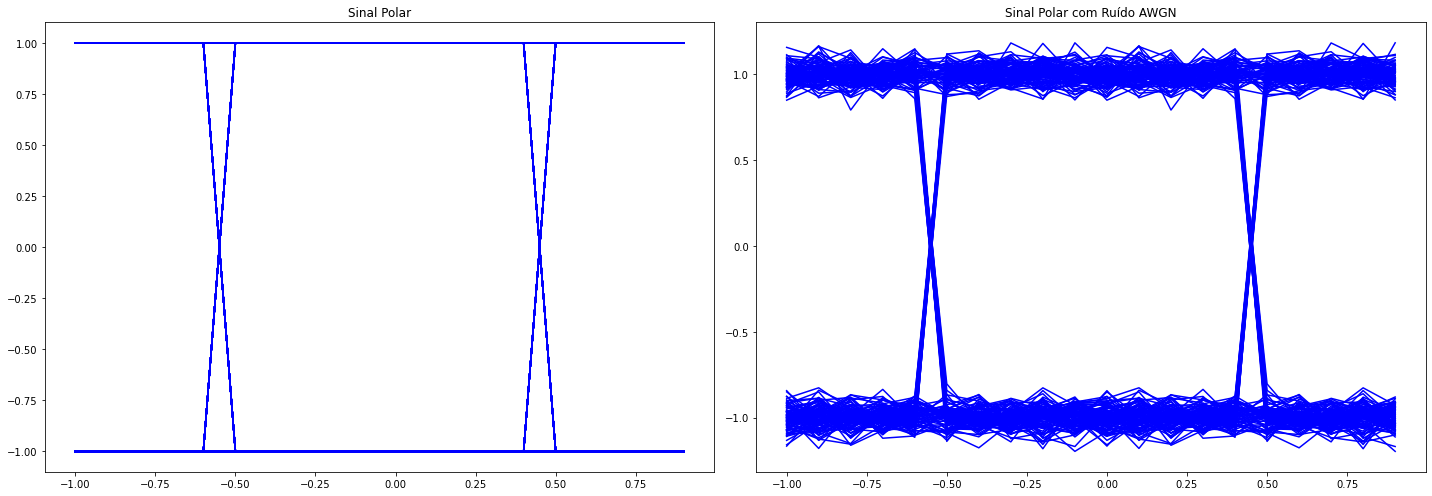

In [277]:
## Gráficos
plt.figure(1,[20,7])
#
plt.subplot(121)
plt.title("Sinal Polar")
drawFullEyeDiagram(rect)
#
plt.subplot(122)
plt.title("Sinal Polar com Ruído AWGN")
drawFullEyeDiagram(yrect)
#
plt.tight_layout()
plt.show()

### Gráfico da Taxa de Erro de Bit (BER) vs 𝐸𝑏/𝑁0 para o modelo simulado e gráfico da Probabilidade de Erro de Bit (𝑃𝑒 teórica) vs 𝐸𝑏/𝑁0.

o Varie a 𝐸𝑏/𝑁0 de 0 a 10 dB (eixo em escala logarítmica).

o Considere 3 valores de bits transmitidos para estimar a BER (por exemplo, 1000, 10000 e 100000 bits).

#### 1000 bits

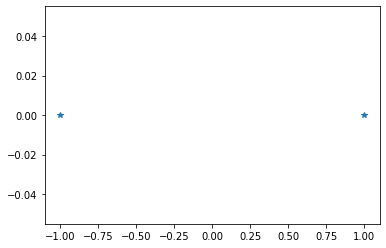

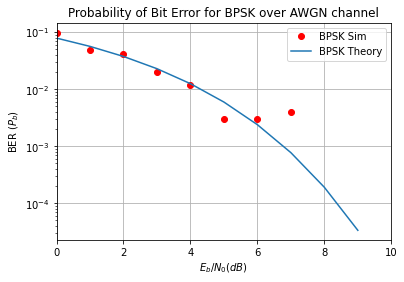

In [154]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**3 # Number of symbols to transmit
EbN0dBs = np.arange(start=0,stop = 10, step = 1) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')

#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(s)**2)/len(s) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(0,10);ax.grid(True);
ax.legend();plt.show()

#### 10000 bits

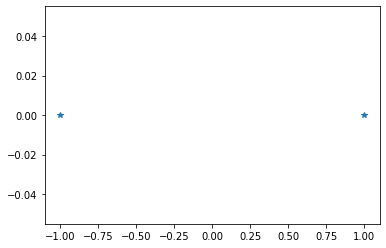

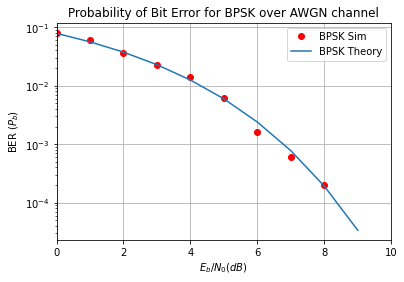

In [152]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**4 # Number of symbols to transmit
EbN0dBs = np.arange(start=0,stop = 10, step = 1) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')

#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(s)**2)/len(s) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(0,10);ax.grid(True);
ax.legend();plt.show()

#### 100000 bits

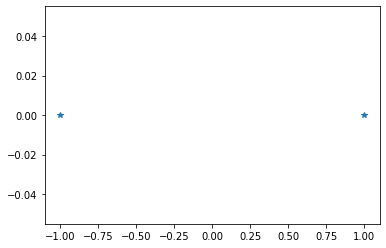

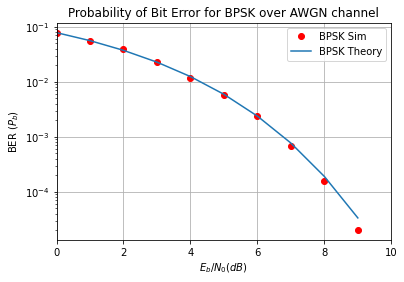

In [153]:
#Eb/N0 Vs BER for BPSK over AWGN (complex baseband model)
# © Author: Mathuranathan Viswanathan (gaussianwaves.com)
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit
EbN0dBs = np.arange(start=0,stop = 10, step = 1) # Eb/N0 range in dB for simulation
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates

M=2 #Number of points in BPSK constellation
m = np.arange(0,M) #all possible input symbols
A = 1; #amplitude
constellation = A*np.cos(m/M*2*np.pi)  #reference constellation for BPSK

#------------ Transmitter---------------
inputSyms = np.random.randint(low=0, high = M, size=nSym) #Random 1's and 0's as input to BPSK modulator
s = constellation[inputSyms] #modulated symbols

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')

#----------- Channel --------------
#Compute power in modulatedSyms and add AWGN noise for given SNRs
for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) #SNRs to linear scale
    P=sum(abs(s)**2)/len(s) #Actual power in the vector
    N0=P/gamma # Find the noise spectral density
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n # received signal
    
    #-------------- Receiver ------------
    detectedSyms = (r <= 0).astype(int) #thresolding at value 0
    BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym #calculate BER

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_sim,color='r',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(0,10);ax.grid(True);
ax.legend();plt.show()

In [184]:
bits = 200
b = np.random.randint(0,2,bits)
d = 2*b-1

##Referências
#### Os códigos utilizados podem ser encontrados nas seguintes páginas
https://dspillustrations.com/pages/posts/misc/eye-diagram-examples.html
https://nbviewer.org/github/vicentesousa/DCO2004_2022/blob/main/notebooks/h08_python.ipynb
https://www.gaussianwaves.com/2020/07/bpsk-python-matlab-bit-error-rate-simulation/